# 局所性保存射影
データ集合に対し類似度行列を定義し，局所性保存射影を求めることで，教師なしの次元削減を行う．  
クラスタ構造を保持したまま分散が大きくなるような射影軸を求める．  

In [1]:
import numpy as np
import scipy.linalg
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# クラスタが1つのデータ
def data_generation1(n=100, random_state=0):
    np.random.seed(random_state)
    return np.concatenate([np.random.randn(n, 1) * 2, np.random.randn(n, 1)],
                          axis=1)

In [3]:
# クラスタが２つあるようなデータ
def data_generation2(n=100, random_state=0):
    np.random.seed(random_state)
    return np.concatenate([np.random.randn(n, 1) * 2, 2 * np.round(
        np.random.rand(n, 1)) - 1 + np.random.randn(n, 1) / 3.], axis=1)

In [4]:
def lpp(x, n_components=1):
    x = x - np.mean(x, axis=0)
    W = np.exp(-np.sum((x[:, None] - x[None]) ** 2, axis=2))  # 類似度行列
    _d = np.sum(W,axis=1)
    D = np.diag(_d)
    L = D-W
    w, v = scipy.linalg.eig(x.T.dot(L.dot(x)), x.T.dot(D.dot(x)))  # 固有値と固有ベクトルを求める
    v = v[np.argsort(-w)]
    w = w[np.argsort(-w)]
    print('w: ',w)
    print('v: ',v)
    return w[:n_components], v[:n_components, :]  # 固有ベクトルをソートし指定した個数取り出す

In [5]:
# 取り出した固有ベクトルにより描画
def plot(x, v):
    plt.xlim(-6., 6.)
    plt.ylim(-6., 6.)
    plt.plot(x[:, 0], x[:, 1], 'rx')
    plt.plot(np.array([-v[:, 0], v[:, 0]]) * 9, np.array([-v[:, 1], v[:, 1]]) * 9)
    #plt.savefig('lpp.png')
    plt.show()

w:  [0.21939761+0.j 0.08576479+0.j]
v:  [[-0.15647624  0.98965034]
 [-0.98768172 -0.14349985]]


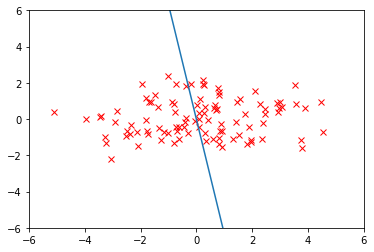

In [7]:
n = 100
n_components = 1
x = data_generation1(n, random_state=0)
w, v = lpp(x, n_components)
plot(x, v)

w:  [0.11337902+0.j 0.0952785 +0.j]
v:  [[-0.05798226  0.99941842]
 [-0.99831761 -0.03410007]]


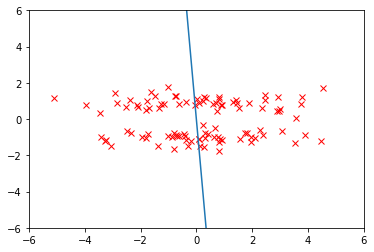

In [8]:
n = 100
n_components = 1
x = data_generation2(n, random_state=0)
w, v = lpp(x, n_components)
plot(x, v)

data1はクラスタが１つしかないまとまりのあるデータでうまく射影できている．  
data2は分散は横方向に広いのに対しクラスタが縦方向に2つ存在している．
このようなデータに局所性保存射影を適用すると，近くに存在するデータを近くに配置するため，
クラスタ情報を保持したまま最大の分散を得られる射影軸を求めることができる．  